In [1]:
print("hello")

hello


In [2]:
import json
import matplotlib.pyplot as plt

In [3]:
with open('top_72_vids.json', 'r') as openfile:
    json_object = json.load(openfile)

json_object

videos = json_object['videos']

In [4]:
import numpy as np
import pandas as pd

In [ ]:
all_data_df = pd.DataFrame(videos)
all_data_df.head()

,videoId,title,channelId,channelTitle,publishedAt,description,duration,durationInSeconds,viewCount,likeCount,...,daysSincePublished,viewsPerDay,regionCode,channelStats,privacyStatus,madeForKids,language,timePeriod,thumbnails,source
0,hDd4B5yuYJY,Bessan Ismail - Al Harbein (Official Music Vid...,UChqTvg4HK6_vNDCwy7XypqQ,Bessan Ismail Music,2025-01-07T16:00:06Z,Bessan Ismail - Al Harbein (Official Music Vid...,PT3M35S,215,63500061,721189,...,91,697803,US,"{'subscriberCount': '1170000', 'videoCount': '...",public,False,unknown,Month 9,NaN,NaN
1,xZWbh0iz_WQ,Anxiety,UCy-gOpJFjjNHXP9lQIVM1Xw,Doechii - Topic,2025-03-05T00:04:48Z,Provided to YouTube by Universal Music Group\n...,PT4M10S,250,24013205,634012,...,34,706271,US,"{'subscriberCount': '667', 'videoCount': '200'...",public,False,unknown,Month 11,NaN,NaN
2,CMbRm7xH2-4,Young Woman Buys Old House and Renovates it Ba...,UC4Tklxku1yPcRIH0VVCKoeA,Quantum Tech HD,2025-01-27T16:00:19Z,Watch as Janine Bruce (娟小刘) transforms not jus...,PT35M9S,2109,16029186,97053,...,71,225763,US,"{'subscriberCount': '16200000', 'videoCount': ...",public,False,en,Month 10,NaN,NaN
3,a7doMHQow0E,Parte & Choke (with Ryan Castro) (Remix),UCcg-nLw72KrpK4-urD_9wNw,Jombriel - Topic,2025-01-24T00:01:36Z,Provided to YouTube by WEA Latina\n\nParte & C...,PT3M39S,219,15555121,157569,...,74,210204,US,"{'subscriberCount': '996', 'videoCount': '35',...",public,False,unknown,Month 10,NaN,NaN
4,cLKCDaNRHW0,How Wagyu Is Made (Farm To Table),UCMyOj6fhvKFMjxUCp3b_3gA,Nick DiGiovanni,2024-04-13T16:00:24Z,I'm sending 10 random subscribers a filet mign...,PT18M42S,1122,15106832,242886,...,360,41963,US,"{'subscriberCount': '25300000', 'videoCount': ...",public,False,en,Month 1,NaN,NaN


In [6]:
for col in all_data_df:
    print(col)

videoId
title
channelId
channelTitle
publishedAt
description
duration
durationInSeconds
viewCount
likeCount
commentCount
daysSincePublished
viewsPerDay
regionCode
channelStats
privacyStatus
madeForKids
language
timePeriod
thumbnails
source


,durationInSeconds,viewCount,likeCount,commentCount,daysSincePublished,viewsPerDay,channelSubscriberCount,channelVideoCount,channelViewCount,madeForKids,descriptionLen,titleLen,channelTitleLen
0,215,63500061,721189,79789,91,697803,1170000,14,166764481,False,1597,75,19
1,250,24013205,634012,5424,34,706271,667,200,230792158,False,480,7,15
2,2109,16029186,97053,3764,71,225763,16200000,402,2265644987,False,1100,97,15
3,219,15555121,157569,636,74,210204,996,35,101002686,False,576,40,16
4,1122,15106832,242886,14084,360,41963,25300000,413,11243196763,False,500,33,15


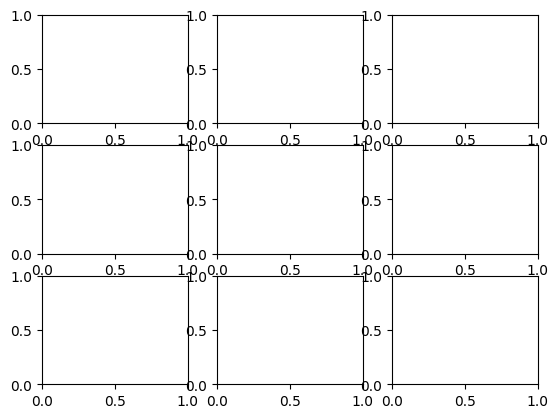

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3,3)



# add quantifiable columns based on the length of different items
all_data_df["descriptionLen"] = all_data_df["description"].apply(len)
all_data_df["titleLen"] = all_data_df["title"].apply(len)
all_data_df["channelTitleLen"] = all_data_df["channelTitle"].apply(len)

# pull out the channel data
all_data_df["channelSubscriberCount"] = all_data_df["channelStats"].apply(lambda x: x['subscriberCount'])
all_data_df["channelVideoCount"] = all_data_df["channelStats"].apply(lambda x: x['videoCount'])
all_data_df["channelViewCount"] = all_data_df["channelStats"].apply(lambda x: x['viewCount'])

# all_data_df['timePublished'] = all_data_df['publishedAt'].apply(lambda x: x.to_datetime)
# clean up the length of the videos so they are just in seconds

only_numbers_df = all_data_df[["durationInSeconds", 
                               "viewCount", 
                               "likeCount", 
                               "commentCount", 
                               "daysSincePublished", 
                               "viewsPerDay", 
                               "channelSubscriberCount", 
                               "channelVideoCount", 
                               "channelViewCount", 
                               "madeForKids",
                               "descriptionLen",
                               "titleLen",
                               "channelTitleLen"
                               ]]


only_numbers_df.head()

4 3


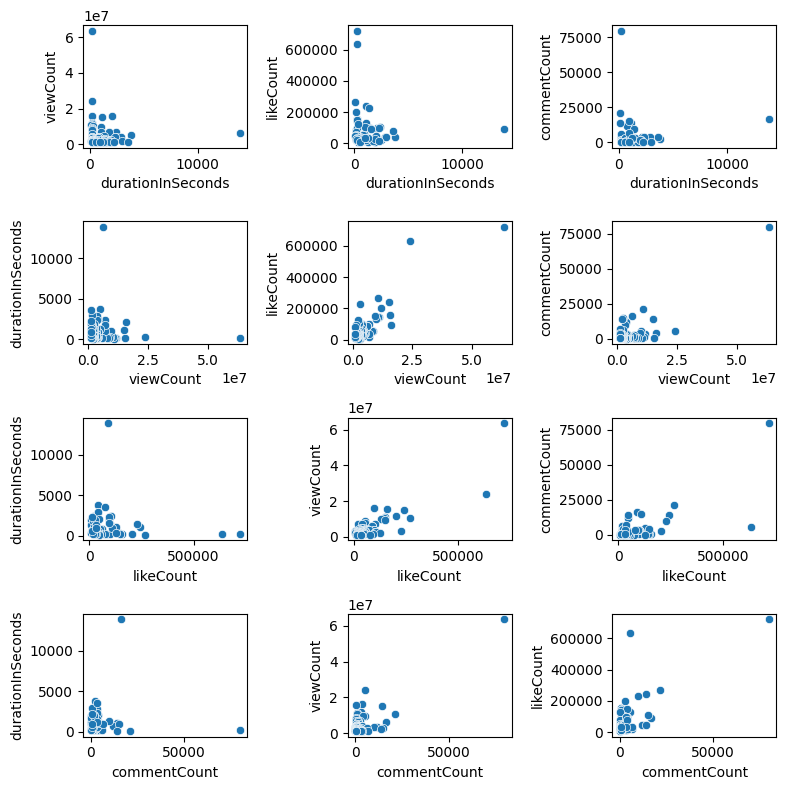

In [8]:
data_subset = all_data_df[["durationInSeconds", "viewCount", "likeCount", "commentCount",]]

rows, cols = data_subset.shape[1], data_subset.shape[1] -1  
print(rows, cols)
fig, axes = plt.subplots(rows, cols, figsize=(8,8))

r, c = 0,0
for col in data_subset:
    c = 0
    for col2 in data_subset:
        if col == col2: continue
        sns.scatterplot(data_subset, x=col, y=col2, ax=axes[r,c])

        c += 1
    r += 1


plt.tight_layout()
plt.show()
# data_subset

Top 10 Absolute Correlations:
 channelViewCount        channelVideoCount         0.884093
channelVideoCount       channelViewCount          0.884093
likeCount               viewCount                 0.870436
viewCount               likeCount                 0.870436
channelViewCount        channelSubscriberCount    0.869077
channelSubscriberCount  channelViewCount          0.869077
commentCount            viewCount                 0.824368
viewCount               commentCount              0.824368
likeCount               commentCount              0.724903
commentCount            likeCount                 0.724903
dtype: float64


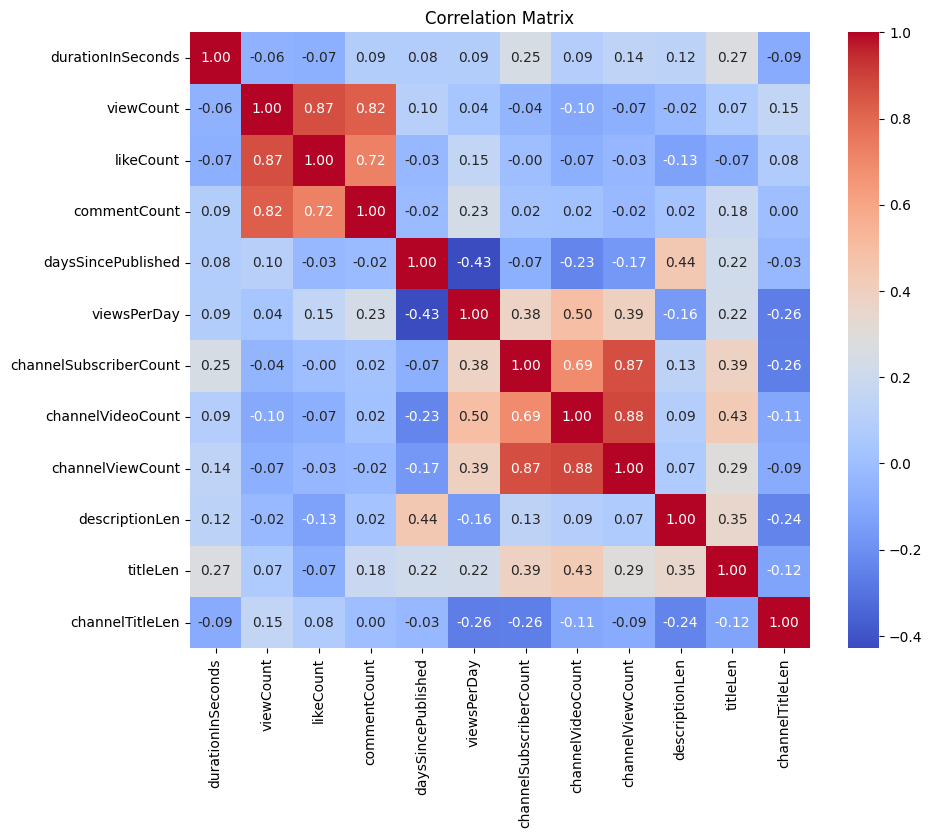

In [19]:
# thank you google AI for providing me with this code.

# Assuming your DataFrame is named 'df'
only_numbers_df = only_numbers_df.drop('madeForKids', axis=1)
correlation_matrix = only_numbers_df.corr()

# Exclude self-correlations and stack the matrix
corr_pairs = correlation_matrix.stack()
corr_pairs = corr_pairs[corr_pairs != 1]  # Remove self-correlations

# Get absolute values for sorting
abs_corr_pairs = corr_pairs.abs().sort_values(ascending=False)

# Print top 10 correlations
print("Top 10 Absolute Correlations:\n", abs_corr_pairs.head(10))

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [10]:
# all are false for being made for kids
only_numbers_df["madeForKids"].value_counts()

madeForKids
False    72
Name: count, dtype: int64

In [28]:
only_numbers_df.describe(include='all')
# only_numbers_df.head()

,durationInSeconds,viewCount,likeCount,commentCount,daysSincePublished,viewsPerDay,channelSubscriberCount,channelVideoCount,channelViewCount,descriptionLen,titleLen,channelTitleLen
count,72.000000,7.200000e+01,72.000000,72.000000,72.000000,7.200000e+01,72,72,72,72.000000,72.000000,72.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,55,56,56,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,254000,952,7397843345,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,5,5,5,NaN,NaN,NaN
mean,1089.930556,5.272776e+06,80582.986111,3950.472222,76.013889,4.343124e+05,NaN,NaN,NaN,1204.805556,37.069444,13.402778
std,1772.189474,8.174830e+06,116417.034231,10042.200882,79.880455,8.236158e+05,NaN,NaN,NaN,1050.318699,26.432122,4.410805
min,92.000000,1.049612e+06,6965.000000,0.000000,0.000000,5.806000e+03,NaN,NaN,NaN,18.000000,3.000000,5.000000
25%,223.750000,1.892094e+06,27585.000000,354.250000,24.750000,3.408975e+04,NaN,NaN,NaN,519.500000,15.500000,10.000000
50%,567.000000,2.580963e+06,42568.000000,1209.000000,59.000000,7.268200e+04,NaN,NaN,NaN,828.500000,33.500000,14.000000
75%,1322.750000,5.215460e+06,95078.250000,3431.250000,83.000000,5.262888e+05,NaN,NaN,NaN,1508.500000,51.750000,16.000000


In [38]:
all_data_df.sort_values('viewCount', ascending=False)


,videoId,title,channelId,channelTitle,publishedAt,description,duration,durationInSeconds,viewCount,likeCount,...,language,timePeriod,thumbnails,source,descriptionLen,titleLen,channelTitleLen,channelSubscriberCount,channelVideoCount,channelViewCount
0,hDd4B5yuYJY,Bessan Ismail - Al Harbein (Official Music Vid...,UChqTvg4HK6_vNDCwy7XypqQ,Bessan Ismail Music,2025-01-07T16:00:06Z,Bessan Ismail - Al Harbein (Official Music Vid...,PT3M35S,215,63500061,721189,...,unknown,Month 9,NaN,NaN,1597,75,19,1170000,14,166764481
1,xZWbh0iz_WQ,Anxiety,UCy-gOpJFjjNHXP9lQIVM1Xw,Doechii - Topic,2025-03-05T00:04:48Z,Provided to YouTube by Universal Music Group\n...,PT4M10S,250,24013205,634012,...,unknown,Month 11,NaN,NaN,480,7,15,667,200,230792158
2,CMbRm7xH2-4,Young Woman Buys Old House and Renovates it Ba...,UC4Tklxku1yPcRIH0VVCKoeA,Quantum Tech HD,2025-01-27T16:00:19Z,Watch as Janine Bruce (娟小刘) transforms not jus...,PT35M9S,2109,16029186,97053,...,en,Month 10,NaN,NaN,1100,97,15,16200000,402,2265644987
3,a7doMHQow0E,Parte & Choke (with Ryan Castro) (Remix),UCcg-nLw72KrpK4-urD_9wNw,Jombriel - Topic,2025-01-24T00:01:36Z,Provided to YouTube by WEA Latina\n\nParte & C...,PT3M39S,219,15555121,157569,...,unknown,Month 10,NaN,NaN,576,40,16,996,35,101002686
4,cLKCDaNRHW0,How Wagyu Is Made (Farm To Table),UCMyOj6fhvKFMjxUCp3b_3gA,Nick DiGiovanni,2024-04-13T16:00:24Z,I'm sending 10 random subscribers a filet mign...,PT18M42S,1122,15106832,242886,...,en,Month 1,NaN,NaN,500,33,15,25300000,413,11243196763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,vfMfv7z0fAM,I Became King Of Villager City..,UCSpfz1IyUA1NBH-cgj8ygUw,SeaWattgaming,2025-04-07T00:50:52Z,"This is another video like ""I Added a Villager...",PT32M3S,1923,1123665,27637,...,en,Month 12,{'default': {'url': 'https://i.ytimg.com/vi/vf...,trending,526,32,13,1710000,65,282168328
68,mLvGVyAwXUs,Pepsi Blue Ice Cream Rolls! Satisfying No Talk...,UCAon55hNT6ESbdQ5y1hRWTA,Ice Cream Rolls,2024-10-05T13:01:01Z,You're not ready for this epic Pepsi Blue Ice ...,PT9M20S,560,1110279,12585,...,en,Month 6,NaN,NaN,2173,56,15,12400000,2737,1716617153
69,D4-xSUJGpuY,Which Country Has The Best Burger?,UChBEbMKI1eCcejTtmI32UEw,Joshua Weissman,2025-04-06T14:30:07Z,"So many countries, so many burger styles. Whic...",PT21M1S,1261,1078460,34012,...,en,Month 12,{'default': {'url': 'https://i.ytimg.com/vi/D4...,trending,472,34,15,10100000,730,2062056842
70,PniUuR0EWwA,Guddi Episode 105 - [Eng Sub] - Bakhtawar Rash...,UCe9JSDmyqNgA_l2BzGHq1Ug,HAR PAL GEO,2025-04-07T18:00:30Z,Thanks for watching Har Pal Geo. Please click ...,PT37M36S,2256,1058630,15132,...,en,Month 12,NaN,NaN,1899,97,11,66900000,164758,69614065225


<Axes: xlabel='viewCount'>

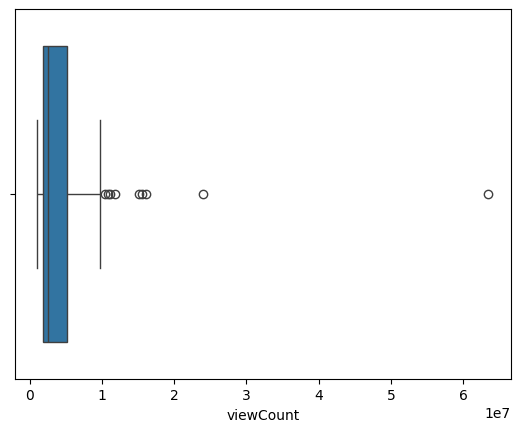

In [33]:
sns.boxplot(data=only_numbers_df, x="viewCount")

In [29]:
only_numbers_df["durationInSeconds"].median()

np.float64(567.0)

<Axes: xlabel='viewCount', ylabel='durationInSeconds'>

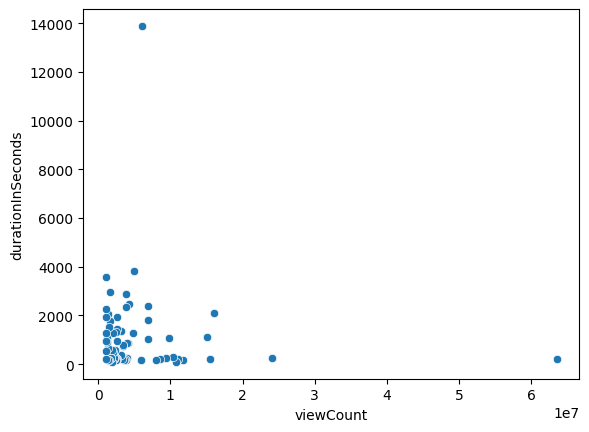

In [11]:
sns.scatterplot(only_numbers_df, x="viewCount", y="durationInSeconds")


In [12]:
# why do we have an outlier for the number of seconds

max_row_index = all_data_df['durationInSeconds'].idxmax()
max_row = all_data_df.iloc[max_row_index]
print(max_row)

videoId                                                         cOLgmA_8V2A
title                                  Poppy Playtime Chapter 4 (FULL GAME)
channelId                                          UChd1FPXykD4pust3ljzq6hQ
channelTitle                                                   Thinknoodles
publishedAt                                            2025-01-31T14:42:39Z
description               Poppy Playtime Chapter 4 Full Gameplay Walkthr...
duration                                                         PT3H51M28S
durationInSeconds                                                     13888
viewCount                                                           6091561
likeCount                                                             89703
commentCount                                                          16450
daysSincePublished                                                       67
viewsPerDay                                                           90919
regionCode  

In [13]:
max_row_index = all_data_df['viewCount'].idxmax()
max_row = all_data_df.iloc[max_row_index]
print(max_row)

videoId                                                         hDd4B5yuYJY
title                     Bessan Ismail - Al Harbein (Official Music Vid...
channelId                                          UChqTvg4HK6_vNDCwy7XypqQ
channelTitle                                            Bessan Ismail Music
publishedAt                                            2025-01-07T16:00:06Z
description               Bessan Ismail - Al Harbein (Official Music Vid...
duration                                                            PT3M35S
durationInSeconds                                                       215
viewCount                                                          63500061
likeCount                                                            721189
commentCount                                                          79789
daysSincePublished                                                       91
viewsPerDay                                                          697803
regionCode  

,durationInSeconds,viewCount,likeCount,commentCount,daysSincePublished,viewsPerDay,descriptionLen,titleLen,channelTitleLen
count,72.000000,7.200000e+01,72.000000,72.000000,72.000000,7.200000e+01,72.000000,72.000000,72.000000
mean,1089.930556,5.272776e+06,80582.986111,3950.472222,76.013889,4.343124e+05,1204.805556,37.069444,13.402778
std,1772.189474,8.174830e+06,116417.034231,10042.200882,79.880455,8.236158e+05,1050.318699,26.432122,4.410805
min,92.000000,1.049612e+06,6965.000000,0.000000,0.000000,5.806000e+03,18.000000,3.000000,5.000000
25%,223.750000,1.892094e+06,27585.000000,354.250000,24.750000,3.408975e+04,519.500000,15.500000,10.000000
50%,567.000000,2.580963e+06,42568.000000,1209.000000,59.000000,7.268200e+04,828.500000,33.500000,14.000000
75%,1322.750000,5.215460e+06,95078.250000,3431.250000,83.000000,5.262888e+05,1508.500000,51.750000,16.000000
max,13888.000000,6.350006e+07,721189.000000,79789.000000,360.000000,3.897864e+06,4506.000000,97.000000,25.000000


In [14]:


# word count -- 
# video games, art, pranks,

with open('video_data.json', 'r') as openfile:
    json_object = json.load(openfile)

dataEntries = json_object["data"]

for videoEntry in dataEntries:
    print(videoEntry["title"])
    print(videoEntry["extracted_likes"])
    print(videoEntry["published_date"])
    print("description len", len(videoEntry["description"]["content"]))

Baby Shark Dance | 
45000000
Jun 18, 2016
description len 3121
Luis Fonsi - Despacito ft. Daddy Yankee
54000000
Jan 13, 2017
description len 794
Wheels on the Bus | @CoComelon Nursery Rhymes & Kids Songs
19000000
May 24, 2018
description len 2397
Bath Song | 
17000000
May 2, 2018
description len 1873
Johny Johny Yes Papa 👶 THE BEST Song for Children | Kids Songs | LooLoo Kids
19000000
Oct 8, 2016
description len 2486
Wiz Khalifa - See You Again ft. Charlie Puth [Official Video] Furious 7 Soundtrack
44000000
Apr 7, 2015
description len 978
Ed Sheeran - Shape of You (Official Music Video)
34000000
Jan 30, 2017
description len 4584
Phonics Song with TWO Words - A For Apple - ABC Alphabet Songs with Sounds for Children


KeyError: 'extracted_likes'